# Typical application of a permutation test: evaluation of the effect of a treatment

A permutation test is a type of non-parametric randomization test in which the null distribution
of a test statistic is estimated by randomly permuting the observations.


Permutation tests are highly attractive because they make no assumptions other than that the
observations are independent and identically distributed under the null hypothesis.

The main step to carry out to conduct a permutation test are the following:
1. Compute an observed statistic $t_{obs}$ on the data.
2. Use randomization to compute the distribution of $t$ under the null hypothesis:
>* Perform $N$ random permutations of the data.
>* For each sample of permuted data, $i$, compute
the statistic $t_i$.
>* This procedure provides the distribution of $t$ under the null hypothesis$H_0$.
3. Compute the p-value as
$p = 𝑃(𝑡 > 𝑡_{𝑜𝑏𝑠} |𝐻_0) |\{𝑡_𝑖 > 𝑡_{𝑜𝑏𝑠}\}|$
where the $t_i$ values include $𝑡_{𝑜𝑏𝑠}$.

# Evaluation of the effect of a treatment


To compare two teaching methods or the effect of a drug or a treatment typically two samples are considered, one undergone the treatment and the other one not.

A typical example can be formulated as follows.

We have two groups of subjects, with 10 subjects for each group. The first (group A) has undergone a diet program A (Diet_A), whereas the second one (group B) to a different diet program (Diet_B).   

To test whether Diet_B is more effective than Diet_A, the difference in weight (Delta_weight_i) is recoded for each subject.  






Let us suppose that we have a situation in which none of the standard mathematical statistical approximations apply. We have computed a test statistic, such as the difference in mean Delta_weight, but do not have a useful approximation, such as that provided by the Central Limit Theorem.

Permutation tests can be useful in these scenarios.

# Test a summary statistic: the difference between the mean weight loss

We have identified a sample statistic to test the effect of Diet_A vs. Diet_B, which is the difference between the sample means of weight loss.

The weight difference (in kg) is recorded for each participant after 2 weeks of diet.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#we can use the following line to simulate an array of values:
#np.random.normal(-1.6, 1, size=10) #

In [3]:
Delta_weight_A= np.array([-1.13,  0.73, -1.23,  0.37, -0.58, -0.76, -2.49, -1.77, -2.84, 1.43])
Delta_weight_B= np.array([-0.56, -1.85, -1.17, -0.17, -1.89, -0.68, -1.44, -2.77, -0.79,-2.15])

We can visualize the data

(array([1., 0., 1., 2., 0., 1., 1., 1., 2., 1.]),
 array([-2.77, -2.51, -2.25, -1.99, -1.73, -1.47, -1.21, -0.95, -0.69,
        -0.43, -0.17]),
 <BarContainer object of 10 artists>)

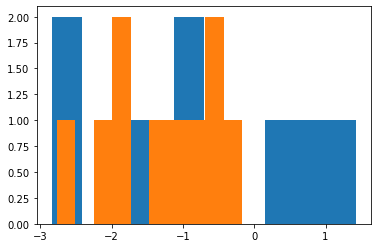

In [39]:
plt.hist(Delta_weight_A, bins=10)
plt.hist(Delta_weight_B, bins=10)

We observed the values above for each individual of the two group. We compute the mean weight differences for groups A and B, which suggests that Diet_B is more effective.

In [38]:
[Delta_weight_A.mean(), Delta_weight_B.mean()]

[-0.827, -1.347]

A difference is observed in the mean values of weigth differences between the two groups.

In [37]:
print(f'The average weight loss in group A is = {Delta_weight_A.mean() : .2f} kg')
print(f'The average weight loss in group B is = {Delta_weight_B.mean() : .2f} kg')
Avg_obs_diff = Delta_weight_A.mean() - Delta_weight_B.mean()
print(f'The difference between the mean values is = {Avg_obs_diff: .2f} kg')

The average weight loss in group A is = -0.83 kg
The average weight loss in group B is = -1.35 kg
The difference between the mean values is =  0.52 kg


Is that difference in mean statistically significant?

Permutation tests take advantage of the fact that if we randomly shuffle the group labels (group A and group B in our case), the resulting distribution of the statistic we consider approximates the null distribution.

The null hypothesis is that the Diet_B is not more effective than Diet_A.

The null distribution can be generated by shuffling the data 1000 times:

In [40]:
n_perm = 1000

We count the total number of subjects that we have

In [41]:
n_examples=Delta_weight_A.shape[0]+Delta_weight_B.shape[0]
print(n_examples)

20


and we put all examples in a same array

In [42]:
Delta_weight_all = np.append(Delta_weight_A, Delta_weight_B)
Delta_weight_all

array([-1.13,  0.73, -1.23,  0.37, -0.58, -0.76, -2.49, -1.77, -2.84,
        1.43, -0.56, -1.85, -1.17, -0.17, -1.89, -0.68, -1.44, -2.77,
       -0.79, -2.15])

We compute the test statistic "difference in mean" between Group A and Group B by randomly permuting the group labels.
This is achieved very simply, by reshuflfing many times (`n_perm`) the array with all examples, and assigning the first one half to  Group A and the second half to  Group B, and computing the mean.

In [45]:
Avg_diff_perm = []
for i in range(n_perm):
    perm_i = np.random.permutation(Delta_weight_all)
    avg_A = perm_i[0:Delta_weight_A.shape[0]].mean()
    avg_B = perm_i[Delta_weight_A.shape[0]:n_examples].mean()
    Avg_diff_perm = np.append(Avg_diff_perm, avg_A - avg_B)
Avg_diff_perm.shape

(1000,)

We obtained an array with the  differences between the means of the weight differences of the two groups under the null hypothesis.

In [46]:
type(Avg_diff_perm)

numpy.ndarray

We can plot the histogram

(array([  2.,   2.,   4.,  14.,  21.,  25.,  39.,  57.,  68.,  82.,  93.,
         92., 105.,  81.,  79.,  66.,  43.,  37.,  37.,  30.,  12.,   5.,
          3.,   0.,   3.]),
 array([-1.536  , -1.40992, -1.28384, -1.15776, -1.03168, -0.9056 ,
        -0.77952, -0.65344, -0.52736, -0.40128, -0.2752 , -0.14912,
        -0.02304,  0.10304,  0.22912,  0.3552 ,  0.48128,  0.60736,
         0.73344,  0.85952,  0.9856 ,  1.11168,  1.23776,  1.36384,
         1.48992,  1.616  ]),
 [<matplotlib.patches.Polygon at 0x7f5642f73a90>])

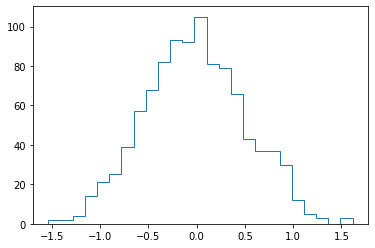

In [50]:
plt.hist(Avg_diff_perm, 25, histtype='step')

We add to the histogram a vertical red line indicating the measured difference in mean between the A and B groups (i.e. the difference in the mean values obtained with the correct group labels)

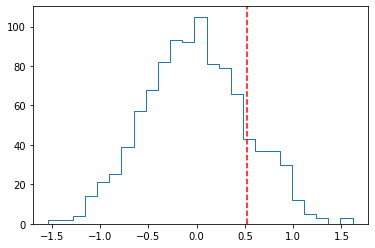

In [51]:
plt.hist(Avg_diff_perm, 25, histtype='step')
plt.axvline(Avg_obs_diff, linestyle='--', color='red')

## Evaluation of the empirical $p$-value

How many of the null means are bigger than the observed value? That proportion would be the $p$-value for the null hypothesis.

$p = \frac{r+1}{N+1}$

where $N$ is the number of permutations and r is the number of times that $t_i > t_{obs}$

We add a 1 to the numerator and denominator to account for misestimation of the p-value (see the reference "Permutation p-values should never be zero: calculating exact P-values when permutations are randomly drawn" https://pubmed.ncbi.nlm.nih.gov/21044043/ )


In [52]:
Avg_diff_perm[Avg_diff_perm > Avg_obs_diff].shape[0]

156

In [56]:
p_value = (Avg_diff_perm[Avg_diff_perm > Avg_obs_diff].shape[0] + 1 )/ (n_perm +1)
print(f'The p value is p = {p_value:.3f}')
if p_value < 0.05:
  print('The difference between the mean weight loss of the two groups is statistically significant! ')
else:
  print('The null hypothesis cannot be rejected')

The p value is p = 0.157
The null hypothesis cannot be rejected


We can conclude that the Diet_B is not more effective that Diet_A.

# Test an arbitrary statistic: e.g. the 90th percentile

If we think that an appropriate test statistic for this problem is the difference between the 90th percentile, and if we knew the null distribution of this statistic, we could test for the null hypothesis that the statistic = 0. Permuting the labels of the 2 data sets allows us to create the empirical null distribution.

Let us suppose that we want to test whether the effect of Diet_A and Diet_B differ, regardless which possibly outperforms the other one. We have to carry out a two-tail test.

The procedure is the same as above, a slightly different code is proposed, where several permutations of the indices of the joint sample elements are computed, then data are assigned to either group A of group B and the test statistic is computed for all permutations.   

The `map()` function applies a given function to each item of an iterable (list, tuple etc.) and returns an iterator.

In [ ]:
n1 = len(Delta_weight_A)

In [ ]:
n1, n2 = map(len, (Delta_weight_A, Delta_weight_B))
n_perm = 1000
data = np.concatenate([Delta_weight_A, Delta_weight_B])
ps = np.array([np.random.permutation(n1+n2) for i in range(n_perm)])

In [ ]:
ps.shape

We can visualize the data with  [matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

In [ ]:
plt.imshow(ps[:100])

In [ ]:
Ap = data[ps[:, :n1]]
Bp = data[ps[:, n1:]]
samples = np.percentile(Ap, 90, axis=1) - np.percentile(Bp, 90, axis=1)

In [ ]:
_ = plt.hist(samples, 25, histtype='step')

In [ ]:
plt.hist(samples, 25, histtype='step')
test_stat = np.percentile(Delta_weight_A, 90) - np.percentile(Delta_weight_B, 90)
plt.axvline(test_stat, linestyle='--', color='red')
plt.axvline(np.percentile(samples, 2.5), linestyle='--')
plt.axvline(np.percentile(samples, 97.5), linestyle='--')
if test_stat>0:
  print(f"p-value ={ 2*(np.sum(samples > test_stat)+1)/(n_perm+1) : .2f}")
else:
  print(f"p-value ={ 2*(np.sum(samples < test_stat)+1)/(n_perm+1) : .2f}")